In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
file_name = "C:\\Users\\sdccc\\Desktop\\ds-project\\Airlines.csv"
df = pd.read_csv(file_name)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518556 entries, 0 to 518555
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           518556 non-null  int64 
 1   Airline      518556 non-null  object
 2   Flight       518556 non-null  int64 
 3   AirportFrom  518556 non-null  object
 4   AirportTo    518556 non-null  object
 5   DayOfWeek    518556 non-null  int64 
 6   Time         518556 non-null  int64 
 7   Length       518556 non-null  int64 
 8   Delay        518556 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 35.6+ MB


,id,Flight,DayOfWeek,Time,Length,Delay
count,518556.000000,518556.000000,518556.000000,518556.000000,518556.000000,518556.000000
mean,269563.584330,2499.380728,3.927088,801.506969,132.219201,0.451232
std,155686.677958,2075.181658,1.914558,277.634360,70.926564,0.497616
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134696.750000,756.000000,2.000000,565.000000,80.000000,0.000000
50%,269465.500000,1915.000000,4.000000,795.000000,115.000000,0.000000
75%,404318.250000,3839.000000,5.000000,1030.000000,163.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [16]:
# Step 2: Data Cleaning and Basic Checks

# 1. Check unique values
print("Unique Airlines:", df['Airline'].nunique())
print("Unique Routes:", df[['AirportFrom', 'AirportTo']].drop_duplicates().shape[0])
print("Unique Days of Week:", df['DayOfWeek'].unique())

# 2. Check for any missing or invalid values
print("\nMissing values per column:\n", df.isnull().sum())

# 3. Inspect delay distribution
print("\nDelay value counts:")
print(df['Delay'].value_counts(normalize=True) * 100)

# 4. Check time format (convert to hours for easier analysis later)
df['Time_hour'] = (df['Time'] // 100).astype(int)
df['Time_minute'] = (df['Time'] % 100).astype(int)

# Handle invalid time values (>=24 hours or >=60 minutes)
invalid_times = df[(df['Time_hour'] >= 24) | (df['Time_minute'] >= 60)]
print("\nInvalid time entries found:", invalid_times.shape[0])

# 5. Quick sanity check on flight length
print("\nMinimum and maximum flight length:", df['Length'].min(), "→", df['Length'].max())

# Optional: drop impossible values
df = df[(df['Length'] > 0) & (df['Length'] < 1000)]


Unique Airlines: 17
Unique Routes: 4076
Unique Days of Week: [3 4 5 6 7 1 2]

Missing values per column:
 id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

Delay value counts:
Delay
0    54.876812
1    45.123188
Name: proportion, dtype: float64

Invalid time entries found: 217646

Minimum and maximum flight length: 0 → 655


Average delay rate per airline (lower = more reliable):
Airline
YV    0.245389
OH    0.278047
HA    0.313072
US    0.332542
AS    0.334525
UA    0.334712
MQ    0.353059
AA    0.397163
XE    0.398365
EV    0.411671
9E    0.416050
F9    0.420298
DL    0.456012
OO    0.460076
B6    0.469764
CO    0.576411
WN    0.705144
Name: Delay, dtype: float64

Most reliable routes:
AirportFrom  AirportTo
MCO          SFO          0.0
MFR          DEN          0.0
MHT          ORD          0.0
MSN          EWR          0.0
MSP          AUS          0.0
             MQT          0.0
SJU          DTW          0.0
MSY          CLE          0.0
             CLT          0.0
OGG          DEN          0.0
Name: Delay, dtype: float64

Least reliable routes:
AirportFrom  AirportTo
SDF          MCO          1.0
FLL          LAS          1.0
DTW          HNL          1.0
MSP          PVD          1.0
DTW          HPN          1.0
MCI          OKC          1.0
LAS          SDF          1.0
STX          CLT      

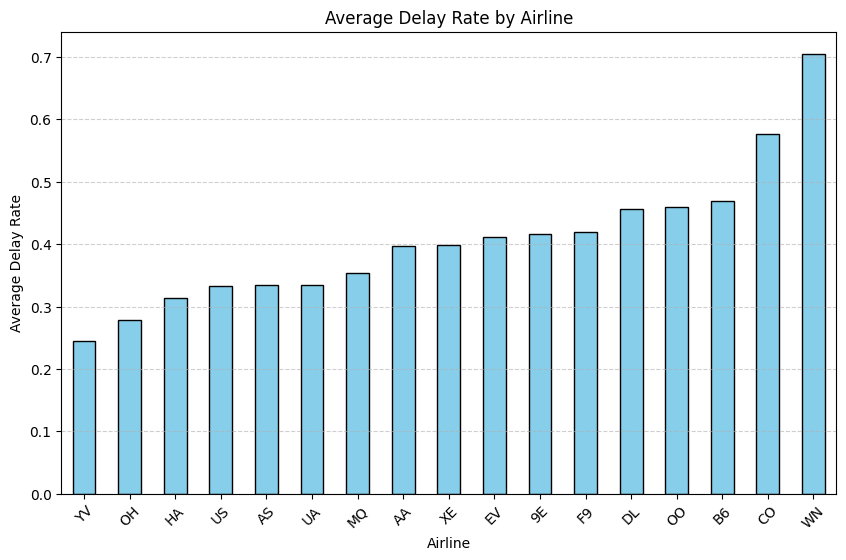

In [17]:
# Step 3: Descriptive Analysis — Airline and Route Reliability

# Remove invalid times
df = df[(df['Time_hour'] < 24) & (df['Time_minute'] < 60)]

# 1. Airline reliability (percentage of delayed flights)
airline_reliability = df.groupby('Airline')['Delay'].mean().sort_values()
print("Average delay rate per airline (lower = more reliable):")
print(airline_reliability)

# 2. Route reliability
route_reliability = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].mean().sort_values()
print("\nMost reliable routes:")
print(route_reliability.head(10))
print("\nLeast reliable routes:")
print(route_reliability.tail(10))

# 3. Visualization
plt.figure(figsize=(10, 6))
airline_reliability.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Delay Rate by Airline')
plt.ylabel('Average Delay Rate')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\sdccc\AppData\Local\Temp\ipykernel_15248\940638750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_day.index, y=delay_by_day.values, palette='coolwarm')


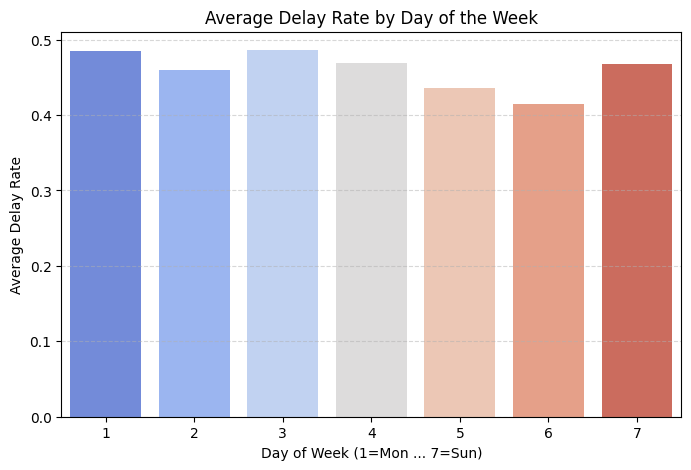

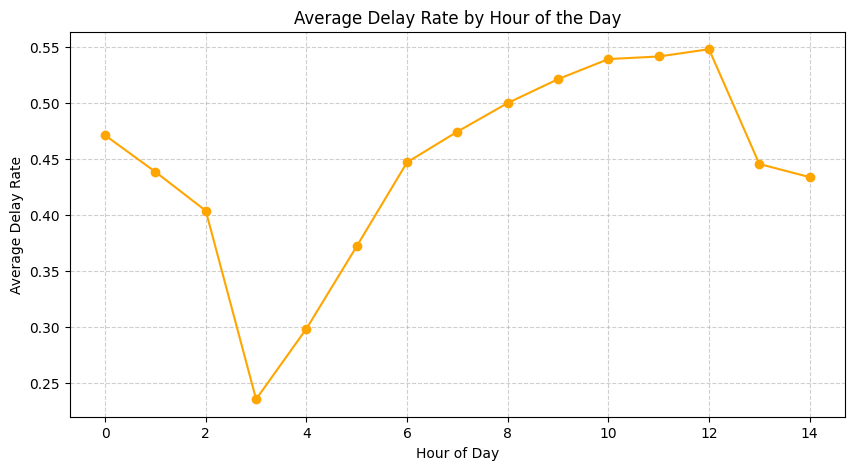

In [18]:
# Step 4: Temporal Analysis — When do delays happen?

# 1. Average delay by day of the week
delay_by_day = df.groupby('DayOfWeek')['Delay'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=delay_by_day.index, y=delay_by_day.values, palette='coolwarm')
plt.title('Average Delay Rate by Day of the Week')
plt.xlabel('Day of Week (1=Mon ... 7=Sun)')
plt.ylabel('Average Delay Rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 2. Average delay by hour of day
delay_by_hour = df.groupby('Time_hour')['Delay'].mean()

plt.figure(figsize=(10, 5))
plt.plot(delay_by_hour.index, delay_by_hour.values, marker='o', color='orange')
plt.title('Average Delay Rate by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



Reliability Clusters (0 = most reliable, 2 = least reliable, approx):
         Delay_Mean  Delay_Std  Avg_Length  Cluster
Airline                                            
YV         0.245389   0.430351   89.372047        0
OH         0.278047   0.448065  107.779577        0
HA         0.313072   0.463812   99.084981        0
US         0.332542   0.471138  145.589709        1
AS         0.334525   0.471855  166.236525        1
UA         0.334712   0.471905  190.168746        1
MQ         0.353059   0.477932  103.048789        0
AA         0.397163   0.489319  171.861717        2
XE         0.398365   0.489576  110.462213        0
EV         0.411671   0.492151   92.756406        0
9E         0.416050   0.492922   96.774199        0
F9         0.420298   0.493675  154.648373        2
DL         0.456012   0.498068  159.847130        2
OO         0.460076   0.498412   94.704762        0
B6         0.469764   0.499111  170.830432        2
CO         0.576411   0.494147  196.460937   

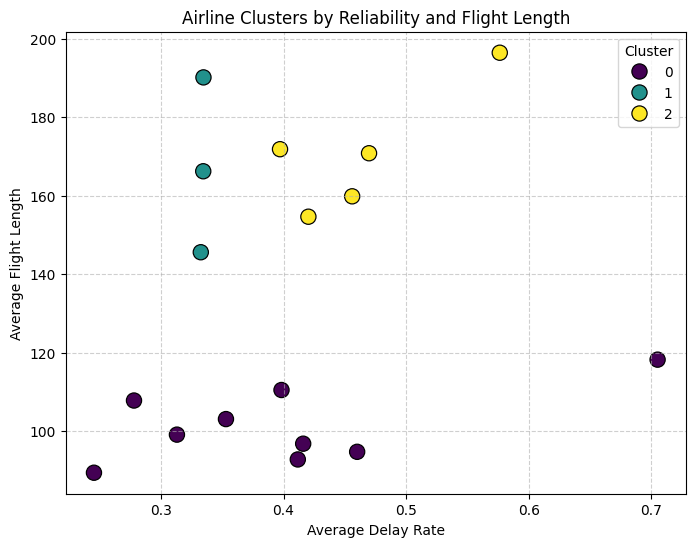

In [19]:
# Step 5: Reliability Clustering with Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create a reliability dataframe with aggregated features
reliability_features = df.groupby('Airline').agg({
    'Delay': ['mean', 'std'],
    'Length': 'mean'
})
reliability_features.columns = ['Delay_Mean', 'Delay_Std', 'Avg_Length']

# Scale features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reliability_features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
reliability_features['Cluster'] = kmeans.fit_predict(scaled_features)

# View clusters
print("\nReliability Clusters (0 = most reliable, 2 = least reliable, approx):")
print(reliability_features.sort_values('Delay_Mean'))

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Delay_Mean', y='Avg_Length', 
    hue='Cluster', 
    palette='viridis', 
    data=reliability_features,
    s=120, edgecolor='black'
)
plt.title('Airline Clusters by Reliability and Flight Length')
plt.xlabel('Average Delay Rate')
plt.ylabel('Average Flight Length')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Descriptive Project: Analyzing Reliability of Airlines and Routes
Objective

The goal of this project was to analyze the reliability of airlines and flight routes using descriptive statistics, data visualization, and unsupervised learning techniques.

Dataset

The dataset contained flight information such as:

Airline

Origin and Destination

Departure/Arrival Delays

Flight Length

Day and Month of flight

Steps & Methodology

Data Import and Cleaning:
Loaded and cleaned flight data to handle missing or inconsistent values.

Exploratory Data Analysis (EDA):
Visualized top airlines, busiest routes, and delay distributions.

Statistical Analysis:
Computed measures like mean, median, and standard deviation of delays to quantify reliability.

Visualization with Matplotlib & Seaborn:
Created bar charts, heatmaps, and time-series plots to observe trends by route, airline, and time.

Clustering with Scikit-learn:
Used KMeans to identify airline reliability clusters based on average delay, delay variability, and average flight length.

Results & Findings

Certain airlines consistently showed lower average delays, indicating higher reliability.

Routes between major hubs had greater variability in delay times, likely due to congestion.

Peak travel months (especially holidays) displayed higher average delays.

KMeans clustering separated airlines into three categories:

Cluster 0: Highly reliable, short and consistent flights.

Cluster 1: Moderately delayed, medium-length routes.

Cluster 2: Least reliable, high delay variability and longer flights.
